# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dhaka Rent.csv')

In [3]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
df.shape # shows no of rows and columns

(60, 2)

In [5]:
df.info() # shows data-type, no of non-null value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [6]:
df.describe() # shows statistical info

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


Text(0.5, 1.0, 'Area Vs. Rent in Dhaka City')

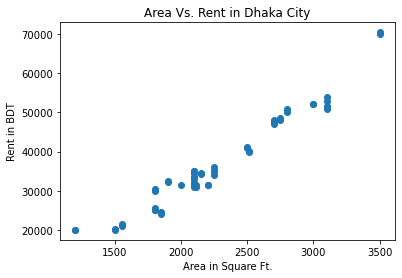

In [7]:
plt.scatter(df['area'], df['rent'])
plt.xlabel('Area in Square Ft.')
plt.ylabel('Rent in BDT')
plt.title('Area Vs. Rent in Dhaka City')

In [8]:
df['area'].mean() # mean of area column

2289.0

In [9]:
df['rent'].mean() # mean of rent column

37269.166666666664

Text(0.5, 1.0, 'Area Vs. Rent in Dhaka City')

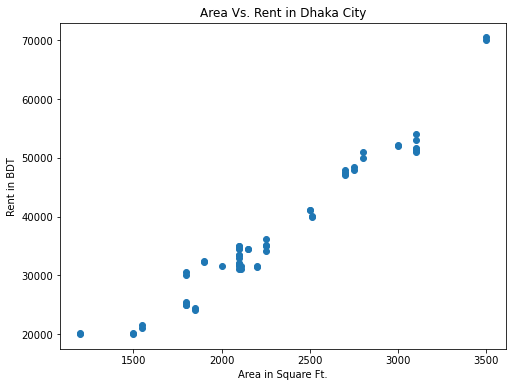

In [10]:
plt.figure(figsize=(8,6)) # changing figure size
plt.scatter(df['area'], df['rent'])
plt.xlabel('Area in Square Ft.')
plt.ylabel('Rent in BDT')
plt.title('Area Vs. Rent in Dhaka City')

In [11]:
len(df['area']) # no of row of particular column

60

In [12]:
df.shape

(60, 2)

In [13]:
x = df[['area']] # feature always should be 2-D array, it can be done in other way: x = df.drop('rent', axis=1)
y = df['rent']
x.shape

(60, 1)

# Splitting the DataSet

In [14]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x,y,train_size=0.7, random_state=1) # test_size can be written instead of train_size

In [15]:
x_train.head() 

,area
52,3500
19,2700
42,2100
56,2750
17,1550


In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [17]:
#fitting the model or training
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
lr.coef_ # In eqn y = mx + c, m is coefficient

array([21.71038918])

In [19]:
lr.intercept_

-12534.95598546139

In [20]:
m=lr.coef_
c=lr.intercept_

In [21]:
x = 1500
y = m * x + c # By training the model, we get the value of m and c for which data are fitted to a straight line, error between actual and predicted value is minimized.

In [22]:
y

array([20030.62777778])

In [23]:
lr.predict([[1500]])

array([20030.62777778])

In [24]:
lr.predict(df[['area']]) # predict entire data set

array([30885.82236552, 33056.86128307, 41741.01695327, 36313.4196594 ,
       52596.21154101, 28714.78344797, 20030.62777778, 27629.2639892 ,
       46083.09478837, 33056.86128307, 34142.38074185, 33056.86128307,
       33056.86128307, 41958.12084502, 36313.4196594 , 54767.25045856,
       26543.74453042, 21116.14723655, 26543.74453042, 46083.09478837,
       33273.96517483, 33056.86128307, 63451.40612876, 13517.51102513,
       48254.13370592, 54767.25045856, 47168.61424714, 26543.74453042,
       35227.90020062, 54767.25045856, 33056.86128307, 33056.86128307,
       41741.01695327, 36313.4196594 , 52596.21154101, 28714.78344797,
       20030.62777778, 27629.2639892 , 46083.09478837, 33056.86128307,
       34142.38074185, 33056.86128307, 33056.86128307, 41958.12084502,
       36313.4196594 , 54767.25045856, 26543.74453042, 21116.14723655,
       26543.74453042, 46083.09478837, 33273.96517483, 33056.86128307,
       63451.40612876, 13517.51102513, 48254.13370592, 54767.25045856,
      

In [25]:
df['new rent'] = lr.predict(df[['area']])
df.head()

,area,rent,new rent
0,2000,31500,30885.822366
1,2100,35000,33056.861283
2,2500,41050,41741.016953
3,2250,36100,36313.419659
4,3000,52100,52596.211541


In [26]:
pred = lr.predict(x_test)
pred

array([33056.86128307, 33056.86128307, 41741.01695327, 26543.74453042,
       33273.96517483, 36313.4196594 , 36313.4196594 , 28714.78344797,
       34142.38074185, 26543.74453042, 48254.13370592, 13517.51102513,
       26543.74453042, 36313.4196594 , 47168.61424714, 20030.62777778,
       33056.86128307, 34142.38074185])

In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,pred) #testing error in terms of mse
mse

4897227.046597254

In [28]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,pred) #testing error in terms of mae
mae

1573.0786240082566

Text(0.5, 1.0, 'Area Vs. Rent in Dhaka City')

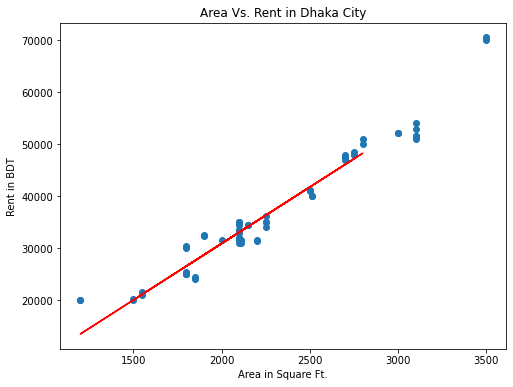

In [31]:
plt.figure(figsize=(8,6)) # changing figure size
plt.scatter(df['area'], df['rent'])
plt.plot(x_test,pred,c='red')#best fitted line
plt.xlabel('Area in Square Ft.')
plt.ylabel('Rent in BDT')
plt.title('Area Vs. Rent in Dhaka City')

Text(0.5, 1.0, 'Area Vs. Rent in Dhaka City')

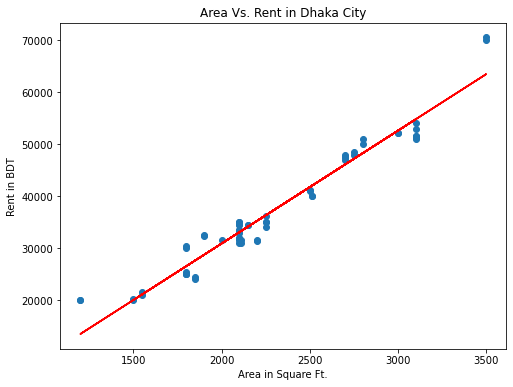

In [34]:
plt.figure(figsize=(8,6)) # changing figure size
plt.scatter(df['area'], df['rent'])
plt.plot(df[['area']],lr.predict(df[['area']]),c='red')#best fitted line of entire dataset
plt.xlabel('Area in Square Ft.')
plt.ylabel('Rent in BDT')
plt.title('Area Vs. Rent in Dhaka City')

In [35]:
lr.score(x_train,y_train)# train accuracy score

0.9515633925067879

In [36]:
lr.score(x_test,y_test)#test accuracy score

0.9174928490312289

In [38]:
lr.score(df[['area']],df['rent'])# score of entire dataset

0.9497963746066768

In [40]:
lr.predict([[3000]])

array([52596.21154101])